In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

/Users/michal/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv('../data/train.csv')

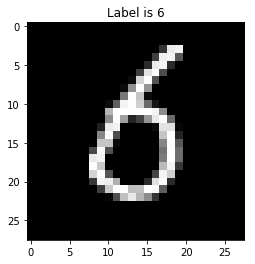

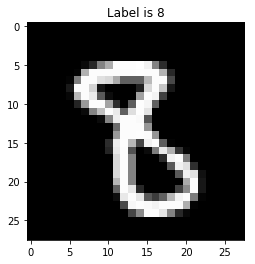

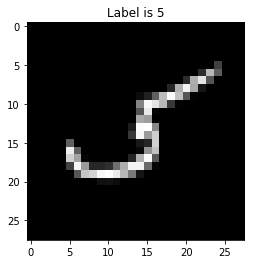

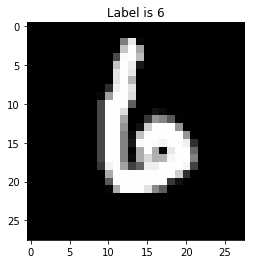

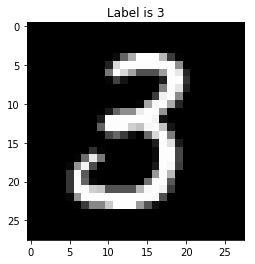

In [3]:
# visualize random some random numbers from the MNIST dataset
for i in range(5):
    rand_num = np.random.randint(0, len(df_train))
    label = df_train['label'].loc[rand_num]
    pixels = df_train.loc[rand_num].drop('label').values
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [4]:
def error_rate(pred, target):
    return np.mean(pred!=target)

In [5]:
def classification_rate(p, t):
    return np.mean(p == t)

In [6]:
def ohe(labels):
    ohe_lab = np.zeros((labels.shape[0], len(set(labels))))
    for i in range(len(labels)):
        ohe_lab[i, labels[i]] = 1
    return ohe_lab     

In [7]:
X = df_train.drop('label', axis=1)/255
X = X.values
Y = pd.DataFrame(ohe(df_train['label']))
Y = Y.values

In [8]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

(42000, 784)
<class 'numpy.ndarray'>
(42000, 10)
<class 'numpy.ndarray'>


In [9]:
max_iter = 20
print_period = 10
lr = 0.00004
reg = 0.01

In [10]:
X_train = X[:-1000]
Y_train = Y[:-1000]
X_test = X[-1000:]
Y_test = Y[-1000:]

In [11]:
N, D = X_train.shape
batch_size = 500
num_batches = N//batch_size

In [12]:
# hidden layer1 nodes
M1 = 300
# hidden layer2 nodes
M2 = 100
# output nodes
K = 10
# starting wieghts
W1_init = np.random.randn(D, M1) / np.sqrt(D+M1)
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1+M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2+K)
b3_init = np.zeros(K)

In [13]:
# get TF variables for the inputs, X and targets T
ftX = tf.placeholder(tf.float32, shape=(None, D), name='X')
ftT = tf.placeholder(tf.float32, shape=(None, K), name='T')

In [14]:
# get TF variables wieghts and biases
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [15]:
Z1 = tf.nn.relu(tf.matmul(ftX, W1)+b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2)+b2)
Yish = tf.matmul(Z2, W3)+b3

In [16]:
rcost = reg*sum([tf.nn.l2_loss(W1), tf.nn.l2_loss(b1), 
                 tf.nn.l2_loss(W2), tf.nn.l2_loss(b2), 
                 tf.nn.l2_loss(W3), tf.nn.l2_loss(b3)])
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=ftT, logits=Yish)) + rcost

In [17]:
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

In [18]:
pred = tf.argmax(Yish, 1)

In [19]:
LL = []
error = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(max_iter):
        X_train, Y_train = shuffle(X_train, Y_train)
        for j in range(num_batches):
            X_batch = X_train[(j*batch_size):(j*batch_size+batch_size)]
            Y_batch = Y_train[(j*batch_size):(j*batch_size+batch_size)]
        
            sess.run(train_op, feed_dict = {ftX: X_batch, ftT: Y_batch})
            if j % print_period == 0:
                cost_val = sess.run(cost, feed_dict={ftX: X_test, ftT: Y_test})
                pred_val = sess.run(pred, feed_dict={ftX: X_test})
                err = error_rate(pred_val, Y_test.argmax(axis = 1))
                print(i,j,cost_val,err)
                LL.append(cost_val)
                error.append(err)

0 0 2299.971 0.886
0 10 2166.7993 0.541
0 20 1896.4388 0.365
0 30 1468.2745 0.259
0 40 1023.49457 0.222
0 50 735.4177 0.172
0 60 591.1703 0.155
0 70 514.20685 0.14
0 80 471.31018 0.124
1 0 466.6052 0.124
1 10 425.74664 0.107
1 20 409.83176 0.117
1 30 395.74515 0.104
1 40 375.06665 0.1
1 50 360.08792 0.101
1 60 347.96994 0.095
1 70 345.28384 0.093
1 80 331.1735 0.097
2 0 330.648 0.095
2 10 328.43726 0.089
2 20 320.6653 0.09
2 30 311.19116 0.086
2 40 307.98727 0.09
2 50 299.79974 0.084
2 60 295.5384 0.09
2 70 288.6923 0.082
2 80 277.34924 0.083
3 0 277.8478 0.081
3 10 278.43832 0.08
3 20 270.5294 0.074
3 30 261.60992 0.081
3 40 266.0707 0.076
3 50 257.86493 0.075
3 60 257.38254 0.076
3 70 244.63167 0.069
3 80 242.30225 0.073
4 0 242.99724 0.073
4 10 242.78535 0.067
4 20 233.3611 0.069
4 30 227.24359 0.066
4 40 229.93121 0.067
4 50 222.05775 0.06
4 60 215.41368 0.058
4 70 218.9056 0.057
4 80 209.326 0.057
5 0 212.39519 0.058
5 10 203.08025 0.055
5 20 201.80391 0.057
5 30 200.40903 0.058
5

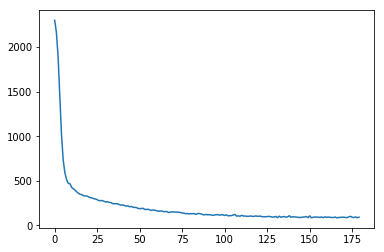

In [20]:
plt.plot(LL)
plt.show()

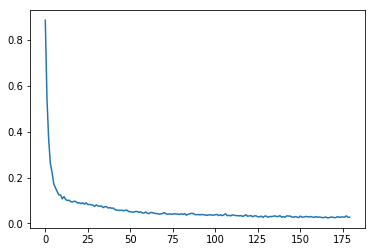

In [21]:
plt.plot(error)
plt.show()